In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
T = 50;
dt = 0.125;
time = np.arange(0,T+dt,dt)

In [47]:
S=np.random.randint(0,2,len(time))

In [49]:
Pn=np.zeros(len(time))

In [51]:
#definig other parameters
Pref = 0 #resting potential
Pmin = -1 #minimum potential
Pth = 25 #threshold
D = 0.25 #leakage factor
Pspike = 4 #spike potential
t_ref = 5 #refractory time duration

In [52]:
count = 0
t_rest = 0

In [54]:
for i,t in enumerate(time):
    if i==0:
        Pn[i] = S[i] - D
    else:
        if t<=t_rest: #Refractory period
            Pn[i] = Pref
        elif t>t_rest: # Not Refractory
            if Pn[i-1]>Pmin: # Not Hyperpolarized
                Pn[i] = Pn[i-1] + S[i] - D
            else: # Hyperpolarized
                Pn[i] = 0
        if Pn[i]>=Pth: # Spike
            Pn[i] += Pspike
            t_rest = t+t_ref

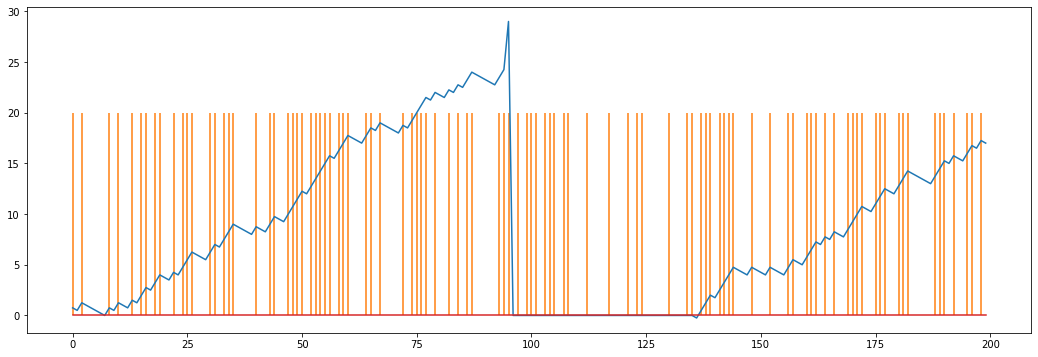

In [82]:
plt.figure(figsize=(18,6))
plt.plot(Pn[:len(time)//2])
plt.stem(S[:len(time)//2]*20,markerfmt=" ",linefmt='C1-')
plt.show()